In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats.contingency import association
from scipy.stats import ttest_ind

In [25]:
df = pd.read_csv('../data/cleaned/cleaned_client_data.csv',parse_dates=['date_time'])

In [26]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [27]:
df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,Test
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,Test
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,Test
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,Test
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,Test


### Client_behavior_analysis

In [28]:
df['clnt_tenure_yr'].min()
df['clnt_tenure_yr'].max()

55.0

In [29]:
numerical_columsn = df.select_dtypes('number')
categorical_columns = df.select_dtypes('object')


#checking for pottentian 

In [30]:
#creating a frequency tabale for gender column for initial analysis 

frequency_table_gender = df['gendr'].value_counts()
frequency_table_gender = pd.DataFrame(frequency_table_gender)
frequency_table_gender

#there's a low number of clients with gender 'X'. So, dropping these rows 

df = df[df['gendr'] != 'X']

#creating a frequency tabale for gender column for initial analysis 
proportion_table_variation = df['variation'].value_counts(normalize=True).round(2)
frequency_table_variation = df['variation'].value_counts()

#checking the general distrubution of Test and Control groups by creating frequency and proportion tables 

frequency_table_variaton = df['variation'].value_counts()
proportion_table_variation = df['variation'].value_counts(normalize=True).round(2)

proportion_table_variation

variation
Test       0.56
Control    0.44
Name: proportion, dtype: float64

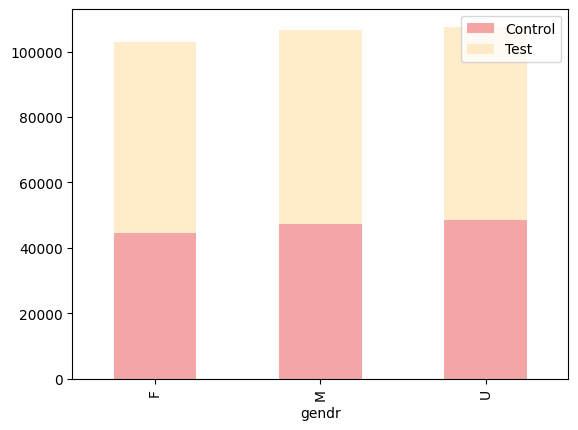

<Figure size 640x480 with 0 Axes>

In [31]:
crosstab_gender_variation = pd.crosstab(df['gendr'],df['variation'])
ax = crosstab_gender_variation.plot(kind='bar', stacked=True, color=['lightcoral', 'moccasin'], alpha=0.7) 
plt.legend()
plt.show()
plt.savefig('../graphs/gender_distribution.jpeg')

#distrubition of gender by variance 

In [32]:
bins = [17, 35, 55, 96.0] 
labels = ['young', 'middle age', 'elderly']

# Adding a new column to the DataFrame with age groups
df['age_group'] = pd.cut(df['clnt_age'], bins=bins, labels=labels, right=False)

In [33]:
# Plotting the crosstabb
ax = crosstab_age_variation.plot(kind='bar', stacked=True, color=['lightcoral', 'moccasin'], alpha=0.7)
plt.legend()

# Tilt the x-axis labels for better readability
plt.xticks(rotation=0)  # Adjust the rotation angle as needed

# Displaying the plot
plt.show()

# Saving the plot as JPEG after displaying it
plt.savefig('../graphs/age_distribution.jpeg')

NameError: name 'crosstab_age_variation' is not defined

In [61]:
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,variation,age_group,completed_orderly
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,Test,elderly,No
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,Test,elderly,No
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,Test,elderly,No
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,Test,elderly,No
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,Test,elderly,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317118,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15,Test,elderly,No
317119,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51,Test,elderly,No
317120,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40,Test,elderly,No
317121,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11,Test,elderly,No


In [34]:
grouped_by_logons_gender_avg_age = df.groupby(['logons_6_mnth','variation','gendr'])['clnt_age'].mean().round(2).reset_index()
grouped_by_logons_gender_avg_age.sort_values(by='logons_6_mnth', ascending=False, inplace=True)
grouped_by_logons_gender_avg_age.to_csv(path_or_buf='../data/cleaned/grouped_by_logons_gender_avg_age.csv', index=True)
grouped_by_logons_gender_avg_age

,logons_6_mnth,variation,gendr,clnt_age
41,9.0,Test,U,43.63
40,9.0,Test,M,52.17
39,9.0,Test,F,54.29
38,9.0,Control,U,42.26
37,9.0,Control,M,51.82
36,9.0,Control,F,52.77
33,8.0,Test,F,52.73
30,8.0,Control,F,53.57
31,8.0,Control,M,51.77
32,8.0,Control,U,44.85


In [35]:
grouped_by_logons_average_age = df.groupby(['logons_6_mnth','variation'])['clnt_age'].mean().round(2).reset_index()
grouped_by_logons_average_age.sort_values(by='logons_6_mnth', ascending=False, inplace=True)
grouped_by_logons_average_age.to_csv(path_or_buf='../data/cleaned/grouped_by_logons_average_age.csv', index=True)

grouped_by_logons_average_age

,logons_6_mnth,variation,clnt_age
12,9.0,Control,48.90
13,9.0,Test,50.00
10,8.0,Control,49.97
11,8.0,Test,50.03
8,7.0,Control,50.11
9,7.0,Test,50.47
6,6.0,Control,49.07
7,6.0,Test,49.36
4,5.0,Control,48.11
5,5.0,Test,48.25


In [36]:
#Checking how many clients reached final step 

In [37]:
#creating a new copy before changing process_step values for easier analysis\ 
df2 = df.copy()

df2['process_step'] = df2['process_step'].replace({'start':0,'step_1':1,'step_2':2,'step_3':3,'confirm':4}).astype('int32').infer_objects(copy=False)

/var/folders/q1/bq_b0f_d53ldgrm4rh3vh1_40000gn/T/ipykernel_1075/885415463.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['process_step'] = df2['process_step'].replace({'start':0,'step_1':1,'step_2':2,'step_3':3,'confirm':4}).astype('int32').infer_objects(copy=False)


In [38]:
#checking clients & visit id's completed the process in order 

grouped_df2 = df2.groupby(['client_id','visit_id','variation','date_time'])['process_step'].sum().reset_index()
step_order = [0,1,2,3,4]
client_steps = grouped_df2.groupby(['client_id','visit_id','variation'])['process_step'].apply(list)
completed_in_order = client_steps[client_steps.apply(lambda steps: steps == step_order)].index.tolist()

#making a new DF from the result and fixing the column names 

completed_in_order= pd.DataFrame(completed_in_order)
completed_in_order.rename(columns={0:'client_id',1:'visit_id', 2:'variation'}, inplace=True)
completed_in_order.to_csv(path_or_buf='../data/cleaned/clients_completed_in_order.csv', index=True)

In [62]:
completion_rate = df.groupby(['client_id','visit_id','variation','completed_orderly'])['client_id'].value_counts()
completion_rate = pd.DataFrame(completion_rate)
completion_rate = completion_rate.reset_index()
completion_rate['variation'].value_counts()

variation
Test       37188
Control    32235
Name: count, dtype: int64

In [64]:
number_test_completed = completed_in_order[completed_in_order['variation']=='Test'].nunique().sum()
number_control_completed = completed_in_order[completed_in_order['variation']=='Control'].nunique().sum()
number_test_completed, number_control_completed

(21176, 18933)

In [65]:
grouped_df2

,client_id,visit_id,variation,date_time,process_step
0,555,637149525_38041617439_716659,Test,2017-04-15 12:57:56,0
1,555,637149525_38041617439_716659,Test,2017-04-15 12:58:03,1
2,555,637149525_38041617439_716659,Test,2017-04-15 12:58:35,2
3,555,637149525_38041617439_716659,Test,2017-04-15 13:00:14,3
4,555,637149525_38041617439_716659,Test,2017-04-15 13:00:34,4
...,...,...,...,...,...
316582,9999729,870243567_56915814033_814203,Test,2017-05-08 16:09:40,4
316583,9999729,99583652_41711450505_426179,Test,2017-04-05 13:40:49,0
316584,9999729,99583652_41711450505_426179,Test,2017-04-05 13:41:04,1
316585,9999832,472154369_16714624241_585315,Test,2017-05-16 16:46:03,0


In [66]:
completed_in_order

,client_id,visit_id,variation
0,555,637149525_38041617439_716659,Test
1,647,40369564_40101682850_311847,Test
2,1195,393817425_39015278493_996341,Control
3,1336,583743392_96265099036_939815,Test
4,1516,255400977_38039535960_779641,Test
...,...,...,...
20085,9998773,980310183_14300639078_417437,Test
20086,9998851,310744937_17135608286_213964,Test
20087,9999009,149965839_24823291142_245569,Test
20088,9999400,288904166_90826265353_276104,Test


In [42]:
#finding average time customers spends per process step 

In [43]:
df3 = df2.copy()

In [44]:
df3

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,variation,age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:51:13,Test,elderly
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:47:50,Test,elderly
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:46:45,Test,elderly
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,3,2017-04-02 11:23:08,Test,elderly
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,2,2017-04-02 11:22:24,Test,elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317118,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,2,2017-03-30 23:59:15,Test,elderly
317119,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,1,2017-03-30 23:58:51,Test,elderly
317120,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,0,2017-03-30 23:58:40,Test,elderly
317121,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,0,2017-03-30 23:55:11,Test,elderly


In [45]:
df3_grouped = df3.groupby(['client_id','visit_id','process_step','variation'])['date_time'].agg('max').reset_index()

df3grouped_sorted = df3_grouped.sort_values(by=['client_id', 'visit_id'])  # Sort the DataFrame


df3grouped_sorted['time_spent'] = df3grouped_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff().fillna(pd.Timedelta(seconds=0))
# Convert time_spent to seconds for better readability
df3grouped_sorted['time_spent'] = df3grouped_sorted['time_spent'].dt.total_seconds()

df3grouped_sorted.to_csv(path_or_buf='../data/cleaned/df3grouped_sorted.csv', index=True)

In [46]:
avg_time_spent_per_step_per_variation = df3grouped_sorted.groupby(['process_step','variation'])['time_spent'].mean().reset_index().round(2)
avg_time_spent_per_step_per_variation.to_csv(path_or_buf='../data/cleaned/avg_time_spent_per_step_per_variation.csv', index=True)
avg_time_spent_per_step_per_variation

,process_step,variation,time_spent
0,0,Control,0.00
1,0,Test,0.00
2,1,Control,18.30
3,1,Test,3.48
4,2,Control,34.25
5,2,Test,37.13
6,3,Control,94.75
7,3,Test,91.91
8,4,Control,129.56
9,4,Test,121.13


In [47]:
total_avg_time_per_variation = avg_time_spent_per_step_per_variation[avg_time_spent_per_step_per_variation['time_spent']!=0].groupby('variation')['time_spent'].mean().round(2)
total_avg_time_per_variation = pd.DataFrame(total_avg_time_per_variation)
total_avg_time_per_variation.to_csv(path_or_buf='../data/cleaned/total_avg_time_per_variation.csv', index=True)


In [48]:
#Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. 
#You should consider moving from a later step to an earlier one as an error.

In [49]:
error_check_df = df[['client_id', 'process_step', 'date_time']].sort_values(by=['client_id', 'date_time']).reset_index()

error_check_df = client_steps[client_steps.apply(lambda steps: not steps == step_order[:len(steps)])].index.tolist()

In [50]:
error_check_df = pd.DataFrame(error_check_df)
error_check_df.rename(columns={0:'client_id',1:'visit_id',2:'variation'})
error_check_df.to_csv(path_or_buf='../data/cleaned/visits_with_error_per_variation.csv', index=True)

In [51]:
# Create a set of tuples containing (client_id, visit_id) pairs from the completed_in_order DataFrame
completed_in_order_set = set(zip(completed_in_order['client_id'], completed_in_order['visit_id']))

# Modify the function to check if the pair exists in the set
def check_orderly(row):
    if (row['client_id'], row['visit_id']) in completed_in_order_set:
        return 'Yes'
    else:
        return 'No'

# Apply the function to create the new column 'completed_orderly'
df['completed_orderly'] = df.apply(check_orderly, axis=1)


In [52]:
#grouping data and creating a variation table for Chi2 Test 
df4 = df.groupby(['variation','completed_orderly'])['visit_id'].value_counts().reset_index()
crosstab_variation_completed_orderly = pd.crosstab(df4['variation'],df4['completed_orderly'])
chi2_statistics, chi2_p_value,dof,_ = chi2_contingency(crosstab_variation_completed_orderly)
chi2_statistics, chi2_p_value, dof

(6.424375161746679, 0.011256450805914087, 1)

In [53]:
crosstab_variation_completed_orderly.to_csv(path_or_buf='../data/cleaned/crosstab_variation_completed.csv')

In [54]:
crosstab_variation_completed_orderly

completed_orderly,No,Yes
variation,,
Control,22745,9458
Test,26558,10582


In [55]:
#hyphothesis testing fo Completion Rate

In [56]:
#H0 : completation rate and variation are independent
#H1 : complition rete and variation are dependant 

In [57]:
test_completion_rate = df.groupby(['client_id','visit_id','variation','completed_orderly'])['completed_orderly'].value_counts()
test_completion_rate = pd.DataFrame(test_completion_rate )
test_completion_rate.reset_index(inplace=True)

#creating a crosstab for chi2Test as these columns are categorical 
test_completion_rate_crosstab = pd.crosstab(test_completion_rate['variation'],test_completion_rate['completed_orderly'])
test_completion_rate_crosstab

completed_orderly,No,Yes
variation,,
Control,22754,9481
Test,26579,10609


In [58]:
#getting p-value 
chi2_statistics, chi2_p_value, dof, _ = chi2_contingency(test_completion_rate_crosstab)
chi2_statistics, chi2_p_value, dof
#as P-value is very small, we reject the null hypothesis and accept alternative : #H1 : complition rete and variation are dependant 

(6.5204780365088695, 0.01066393357703086, 1)

In [115]:
#Cramér's V to check how strong this dependancy 
association(test_completion_rate_crosstab, method='cramer')
#which seems to be low, so the relation does not seem to be strong 


0.0097232793109318

In [ ]:
#Completion Rate with a Cost-Effectiveness Threshold
total_by_row = test_completion_rate_crosstab.sum(axis=1)

test_completion_rate_crosstab.loc['Control', 'yes%'] = test_completion_rate_crosstab.loc['Control', 'Yes'] / total_by_row.loc['Control'] * 100
test_completion_rate_crosstab.loc['Test', 'yes%'] = test_completion_rate_crosstab.loc['Test', 'Yes'] / total_by_row.loc['Test'] * 100


In [ ]:
test_completion_rate_crosstab.loc['Control', 'no%'] = test_completion_rate_crosstab.loc['Control', 'No'] / total_by_row.loc['Control'] * 100
test_completion_rate_crosstab.loc['Test', 'no%'] = test_completion_rate_crosstab.loc['Test', 'No'] / total_by_row.loc['Test'] * 100

In [ ]:
test_completion_rate_crosstab_extra = test_completion_rate_crosstab.drop(['No','Yes','no%'], axis=1)
test_completion_rate_crosstab_extra = test_completion_rate_crosstab_extra.round(2)
sns.countplot(
    data = test_completion_rate_crosstab_extra,
    x=test_completion_rate_crosstab_extra.index,
    hue=test_completion_rate_crosstab_extra['yes%'],
    palette=['moccasin','lightcoral']
    
)

In [ ]:
#the difference does not match the threshold 

In [ ]:
test_completion_rate_crosstab_extra.columns

In [ ]:
#hyphothesis testing for time spent 

In [ ]:
#H0 : time spent and variation are independent
#H1 : time spent and variation are dependant 

In [102]:
avg_time_spent_per_step_per_variation['process_step'] = avg_time_spent_per_step_per_variation['process_step'].astype('str')
average_total = avg_time_spent_per_step_per_variation.groupby('variation')['time_spent'].mean()
average_total = pd.DataFrame(average_total)
average_total
avg_time_spent_per_step_per_variation

,process_step,variation,time_spent
2,1,Control,18.30
3,1,Test,3.48
4,2,Control,34.25
5,2,Test,37.13
6,3,Control,94.75
7,3,Test,91.91
8,4,Control,129.56
9,4,Test,121.13


Text(0.5, 1.0, 'Average Total Time Spent')

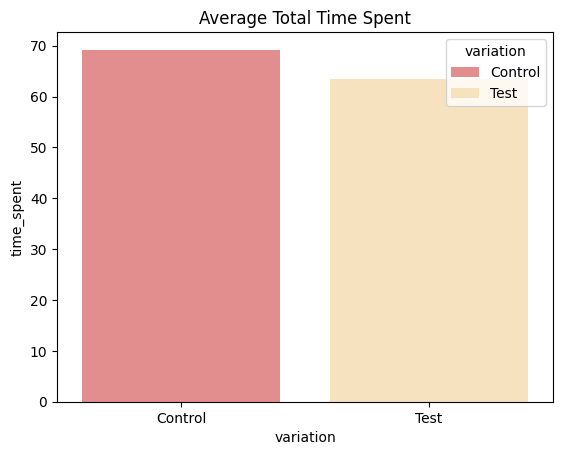

In [110]:
sns.barplot(average_total,
            x='variation',
            y='time_spent',
            hue='variation',
           palette=['lightcoral','moccasin'],
           legend=True)
plt.title('Average Total Time Spent')

In [112]:
# Separate the data into control and test groups
control_data = avg_time_spent_per_step_per_variation[avg_time_spent_per_step_per_variation['variation'] == 'Control']['time_spent']
test_data = avg_time_spent_per_step_per_variation[avg_time_spent_per_step_per_variation['variation'] == 'Test']['time_spent']

# Perform the t-test
t_statistic, p_value = ttest_ind(control_data, test_data)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Statistically significant difference")
else:
    print("No statistically significant difference")

T-statistic: 0.15631828236223522
P-value: 0.8809091579376189
No statistically significant difference


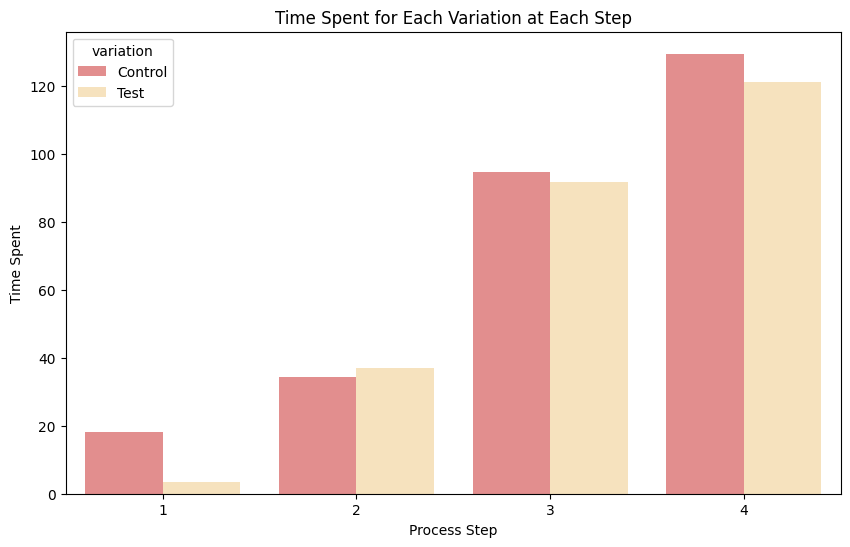

In [90]:
# Assuming avg_time_spent_per_step_per_variation is your DataFrame
avg_time_spent_per_step_per_variation = avg_time_spent_per_step_per_variation[avg_time_spent_per_step_per_variation['time_spent'] != 0]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='process_step', y='time_spent', hue='variation', data=avg_time_spent_per_step_per_variation, palette=['lightcoral','moccasin'])
plt.title('Time Spent for Each Variation at Each Step')
plt.xlabel('Process Step')
plt.ylabel('Time Spent')
plt.show()

In [107]:
grouped_for_ttest